Project Presentation link:
https://docs.google.com/presentation/d/1jOwZd_XLT0n_uOhhmObjzqZRpzVkGF7pLAaFviAC7sM/edit?usp=sharing

#Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression

#Data Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile("/content/drive/MyDrive/csv/bank+marketing.zip","r") as zipObj:
  zipObj.extractall("/content/drive/MyDrive/test3")

In [ ]:
with ZipFile("/content/drive/MyDrive/test3/bank.zip","r") as zipObj:
  zipObj.extractall("/content/drive/MyDrive/test4")


#DATASET

In [ ]:
path = "/content/drive/MyDrive/test4/bank.csv"
data = pd.read_csv(path, sep =";")
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
print(data)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

#Data Preprocessing

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.shape

(4521, 17)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
['married' 'single' 'divorced']
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
['primary' 'secondary' 'tertiary' 'unknown']
secondary    2306
tertiary     1350
primary       678
unknown      

In [ ]:
df= data.replace(to_replace=-1, value=0)



In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,0,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,0,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.658925,15.915284,263.961292,2.793630,40.586154,0.542579
std,10.576211,3009.637619,8.247667,259.856633,3.109807,99.787552,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.drop(['day','month'],axis = 1, inplace = True)

#Data Visualization

In [ ]:
from sklearn.preprocessing import LabelEncoder
d4 = df.apply(LabelEncoder().fit_transform)

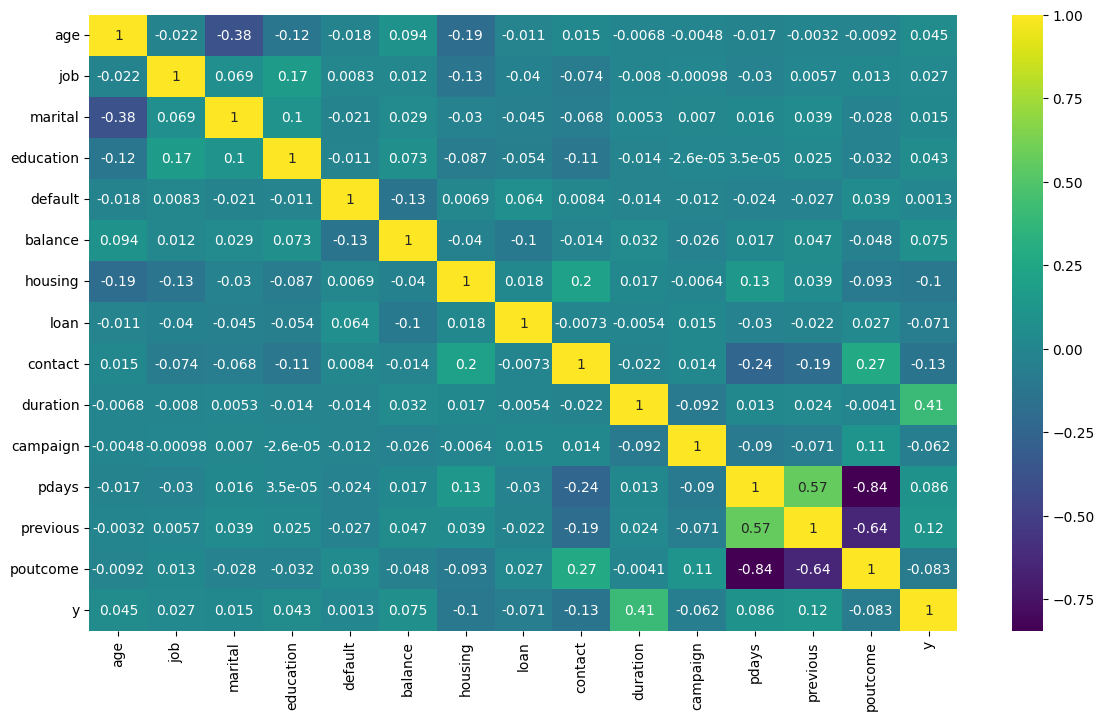

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(d4.corr(),annot=True,cmap='viridis')
plt.show()

<Axes: xlabel='default', ylabel='count'>

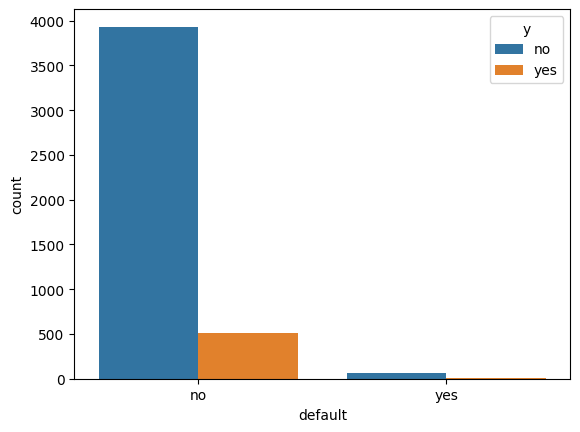

In [ ]:
sns.countplot(x=df["default"],hue=df["y"])

<Axes: xlabel='loan', ylabel='count'>

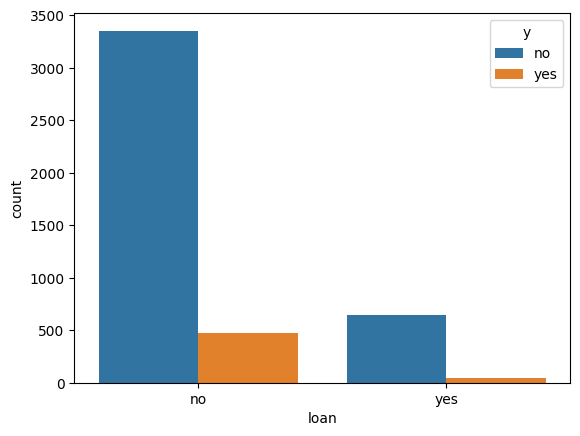

In [ ]:
sns.countplot(x=df["loan"],hue=df["y"])

<Axes: xlabel='housing', ylabel='count'>

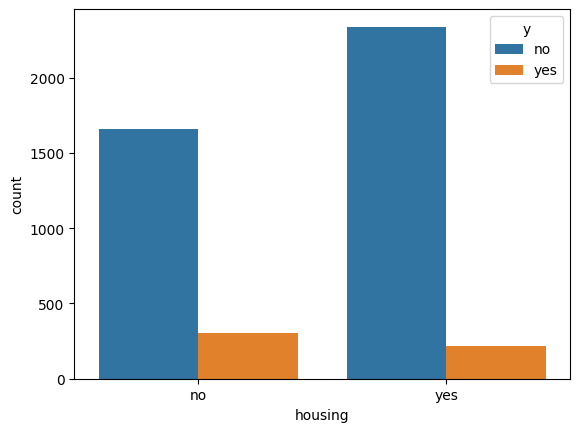

In [ ]:
sns.countplot(x=df["housing"],hue=df["y"])

<Axes: xlabel='duration', ylabel='Count'>

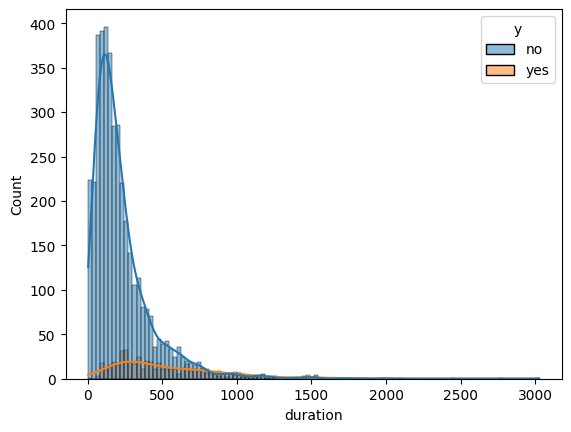

In [ ]:
sns.histplot(data=df, x='duration', hue='y',kde=True)

<Axes: xlabel='duration', ylabel='Density'>

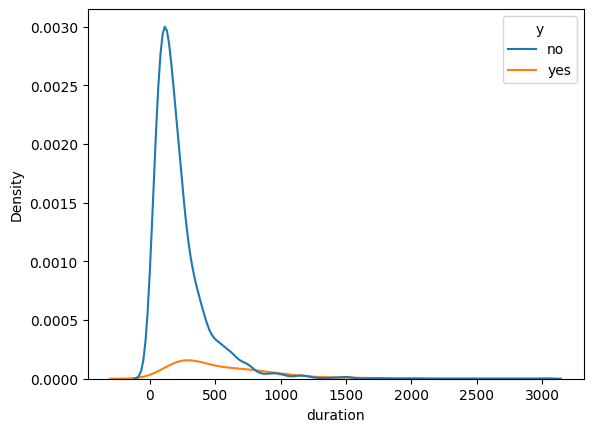

In [ ]:
sns.kdeplot(x='duration', data=df, hue='y')

<Axes: xlabel='y', ylabel='duration'>

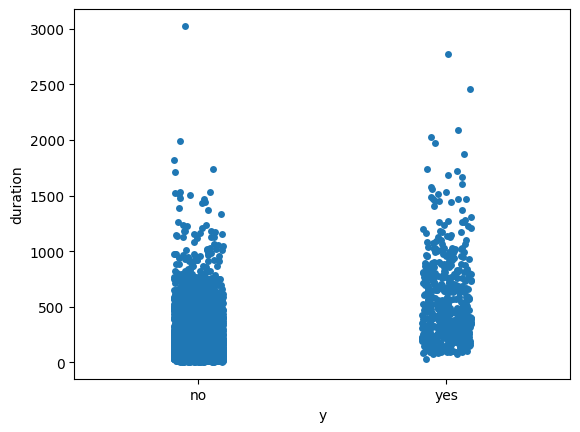

In [ ]:
sns.stripplot(data=df, y='duration',x='y')

<Axes: xlabel='pdays'>

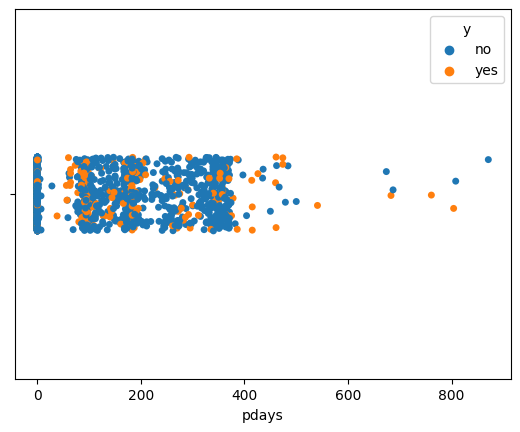

In [ ]:
sns.stripplot(data=df, x='pdays', hue='y')

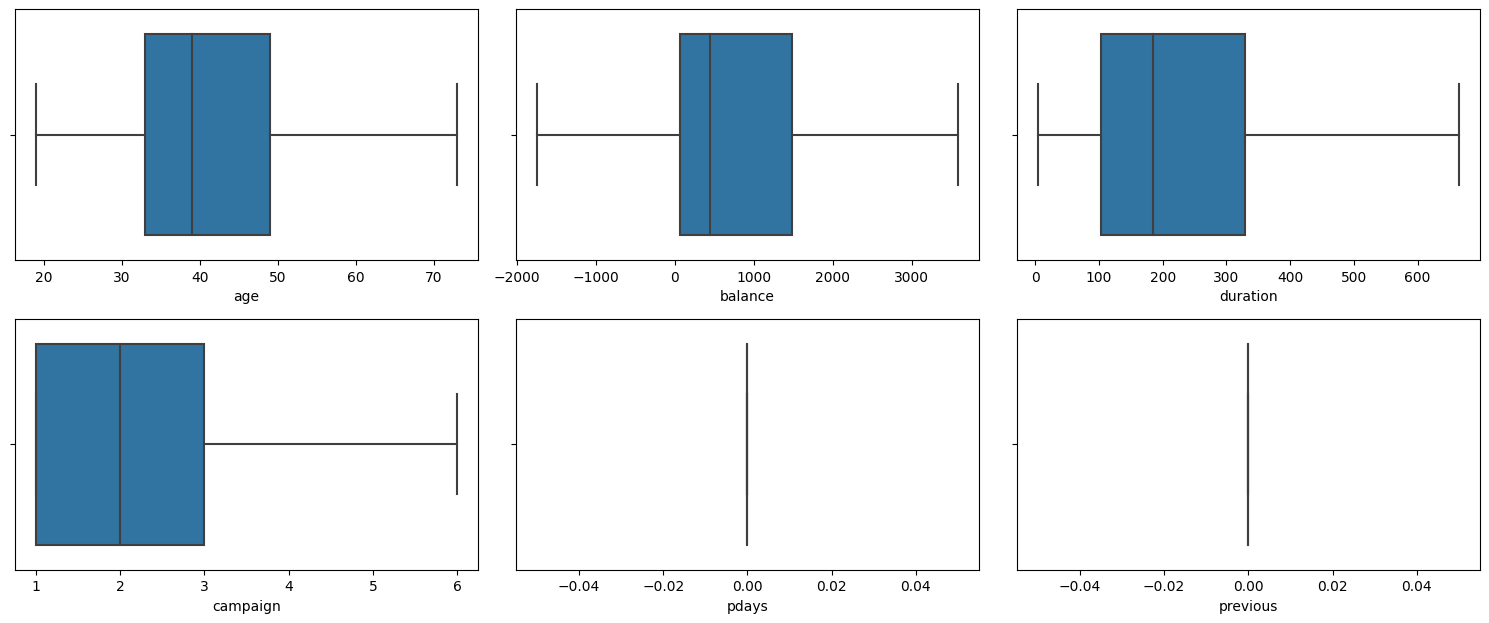

In [ ]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot( rows, cols, i+1)

    sns.boxplot(x=df[col], ax=ax,showfliers= False)

fig.tight_layout()
plt.show()

<Axes: xlabel='duration', ylabel='y'>

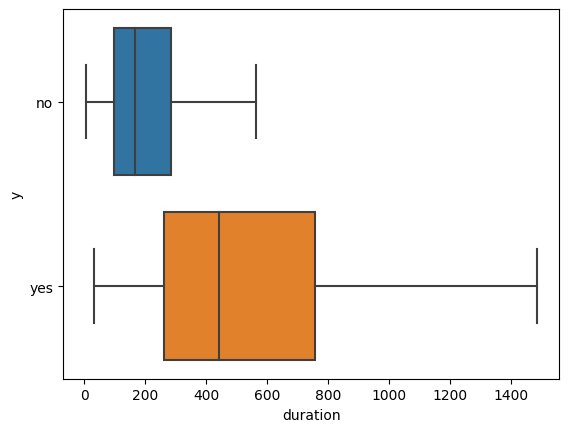

In [ ]:
sns.boxplot(x='duration',y='y',data=df,showfliers=False)

<Axes: xlabel='age', ylabel='balance'>

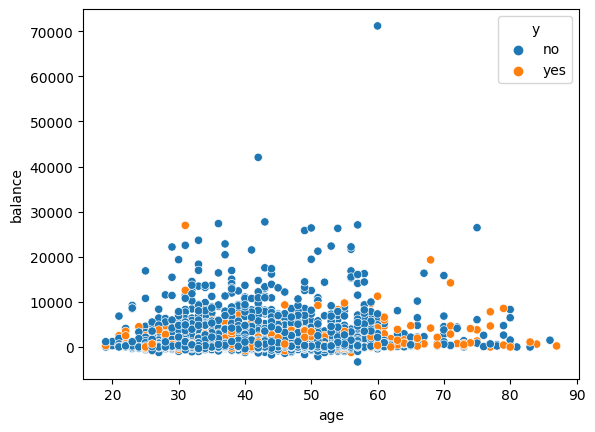

In [ ]:
sns.scatterplot(data=df, x='age',y='balance', hue='y')

Text(0.5, 1.0, 'contact medium')

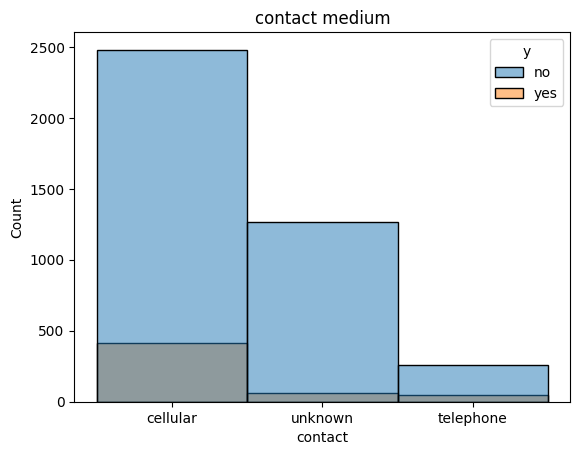

In [ ]:

sns.histplot(data=df, x='contact', hue='y')

# Add title
plt.title("contact medium")

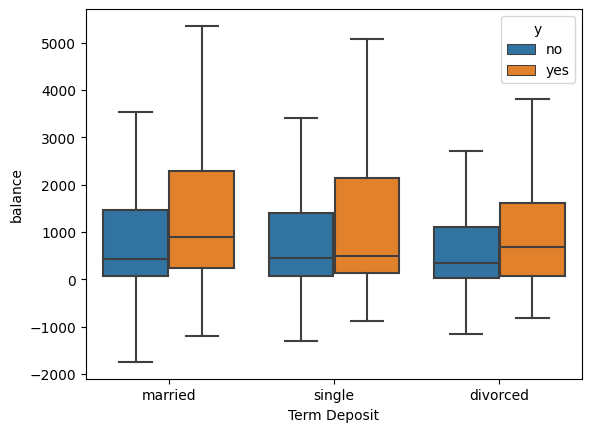

In [ ]:

sns.boxplot(x=df['marital'],y=df['balance'], hue=df["y"],showfliers=False)
plt.xlabel("Term Deposit")
plt.show()

<Axes: xlabel='y', ylabel='balance'>

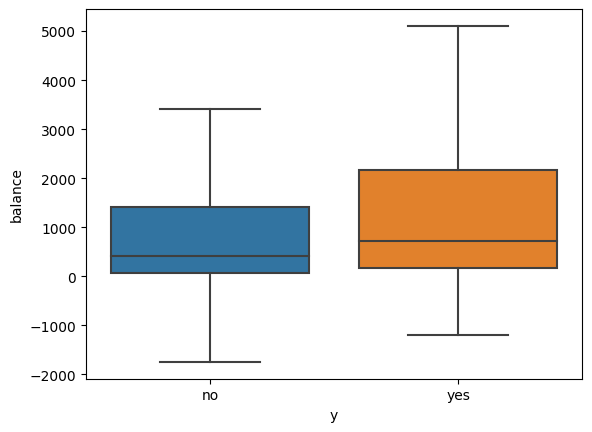

In [ ]:
sns.boxplot(x=df.y, y=df.balance,showfliers=False)

In [ ]:
fig = px.histogram(df, x='balance')

fig.show()

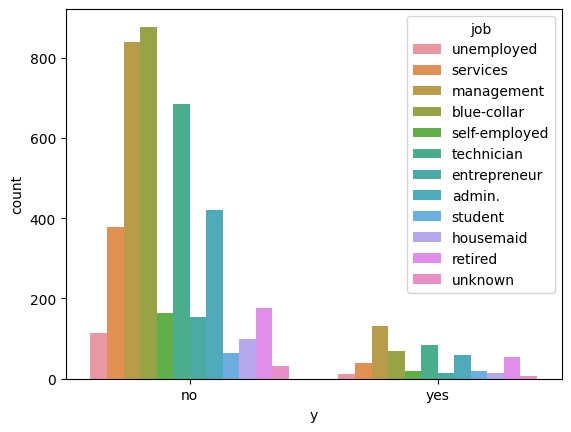

In [ ]:
sns.countplot(x=df['y'],hue=df['job'],data=df)
sns.set(rc={'figure.figsize':(6,6)})

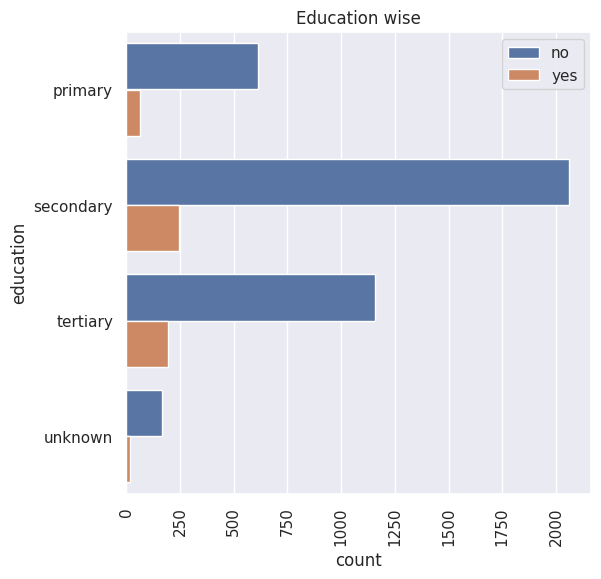

In [ ]:
sns.countplot(y='education',hue='y',data=df)
sns.set(rc={'figure.figsize':(2,2)})
plt.xticks(rotation=90)
plt.title('Education wise')
plt.legend(loc=1)

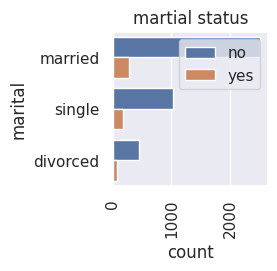

In [ ]:
sns.countplot(y='marital',hue='y',data=df)
sns.set(rc={'figure.figsize':(12,6)})
plt.xticks(rotation=90)
plt.title('martial status')
plt.legend(loc=1)

<Axes: xlabel='campaign', ylabel='poutcome'>

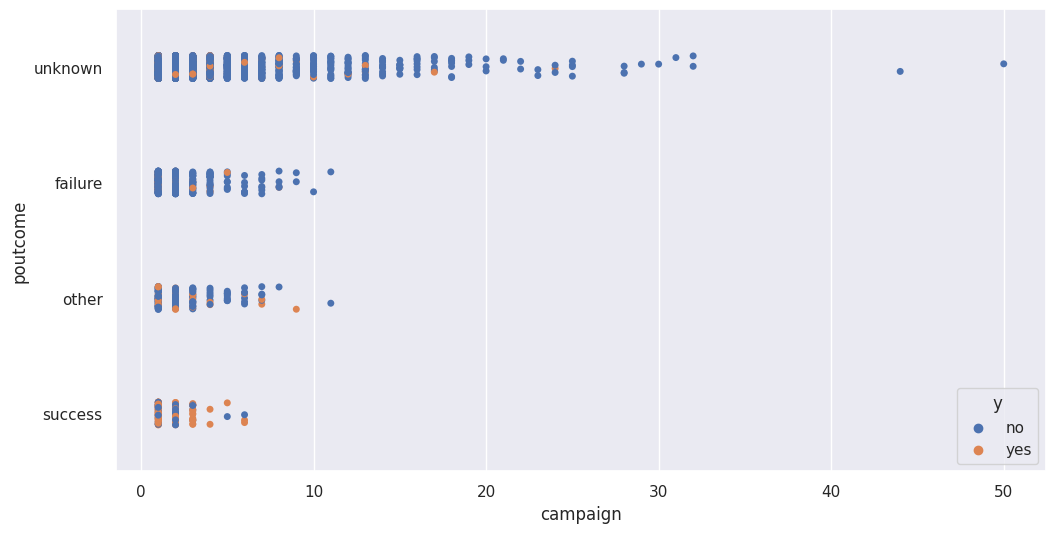

In [ ]:
sns.stripplot(x=df['campaign'],y=df['poutcome'], hue=df["y"])

#Dummy variable encoding

In [ ]:
x=df.drop(['y'],axis=1)

print(x)
Y = df['y']
print(Y)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  duration  campaign  pdays  previous poutcome  


In [ ]:
X= pd.get_dummies(x, drop_first=True)
print(X)
y = pd.get_dummies(Y,drop_first=True)
print(y)

      age  balance  duration  campaign  pdays  previous  job_blue-collar  \
0      30     1787        79         1      0         0                0   
1      33     4789       220         1    339         4                0   
2      35     1350       185         1    330         1                0   
3      30     1476       199         4      0         0                0   
4      59        0       226         1      0         0                1   
...   ...      ...       ...       ...    ...       ...              ...   
4516   33     -333       329         5      0         0                0   
4517   57    -3313       153         1      0         0                0   
4518   57      295       151        11      0         0                0   
4519   28     1137       129         4    211         3                1   
4520   44     1136       345         2    249         7                0   

      job_entrepreneur  job_housemaid  job_management  ...  \
0                    0   

In [ ]:
column_names = list(df.columns)
print(column_names)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


#Logistic Regression

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid1 = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid1, cv = 5)

logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, train_size=0.90 ,random_state =30)


In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=31.622776601683793,solver='lbfgs', max_iter=1000)



In [ ]:
logreg.fit(X_train, y_train.values.ravel())


LogisticRegression(C=31.622776601683793, max_iter=1000)

In [ ]:
predictions = logreg.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.901


#Decision Tree Classifier

In [ ]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 4}
Best score is 0.8894052217278638


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure same results each run
bank_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 6, min_samples_leaf= 1)

# Fit model
bank_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6)

In [ ]:
pred = bank_model.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(bank_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.885


#Random Forest classifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9]}


# grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
# grid_search.fit(X_train, y_train.values.ravel())
# print(grid_search.best_estimator_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,n_estimators=50)
forest_model.fit(X_train, y_train.values.ravel())
bank_preds = forest_model.predict(X_test)


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(forest_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.896


#KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(X_test)
print('Accuracy of knn classifier on test set: {:.3f}'.format(classifier.score(X_test, y_test)))

Accuracy of knn classifier on test set: 0.883


#SVM

In [ ]:
from sklearn.svm import SVC
#Build the model
svm = SVC(kernel="rbf", gamma=0.01, C=10)
# Trained the model
svm.fit(X_train, y_train.values.ravel())

SVC(C=10, gamma=0.01)

In [ ]:
y_pred= svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.885


#Boosting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
adaboost = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.2)
adaboost.fit(X_train, Y_train)
score = adaboost.score(X_test, Y_test)

In [ ]:
print(score)

0.9102969046114971


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, train_size=0.65 ,random_state =30)

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
xgboost.fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)],verbose = False)
score_xgb = xgboost.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



In [ ]:
score_xgb

0.8932406822488945